# Final Project Submission


* Student name: Chris Lewis
* Student pace: part time - online
* Scheduled project review date/time: 
* Instructor name: James Irving
* Blog post URL: 


# Generic Question for Project

What type of films are currently doing the best at the box office?
You must then translate those findings into actionable insights that the CEO can use when deciding what type of films they should be creating.

# Import


#### Importing libraries:

In [1]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
from pandasql import sqldf

# Reading files and placing them into separate dataframes

## Using pandas read_csv() function to put each file from the zipped folder into a Dataframe.

### We are taking the first file (bom.movie_gross.csv.gz) and putting it  into the variable 'movie_gross_df' as a dataframe object.

In [2]:
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross_df.head(3)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010


In [3]:
movie_gross_df = movie_gross_df.rename(columns={'title':'primary_title'})

In [4]:
movie_gross_df.dtypes

primary_title      object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [5]:
len(movie_gross_df)

3387

#### Within the dtypes of the movie_gross_df, we notice that the foreign_gross column contains object values - most likely string values. So let's change those to floats. There are also commas within the values, so we will need to remove those with the .replace() method.

In [6]:
type(movie_gross_df['foreign_gross'][0])

str

In [7]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].str.replace(',', '')
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)
movie_gross_df.dtypes

primary_title      object
studio             object
domestic_gross    float64
foreign_gross     float64
year                int64
dtype: object

### Our next file (imdb.name.basics.csv.gz) is placed into the 'imdb_name_df' variable. Let's inspect the contents. Everything looks good so far, but we can clean it further later on if we need to.

In [8]:
imdb_name_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_name_df.head(3)

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"


In [9]:
imdb_name_df.dtypes

nconst                 object
primary_name           object
birth_year            float64
death_year            float64
primary_profession     object
known_for_titles       object
dtype: object

### Our next file (imdb.title.akas.csv.gz) is put into the 'imdb_title_df' variable. Let's inspect the contents.

In [10]:
imdb_title_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_df.head(3)

,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0


In [11]:
imdb_title_df.dtypes

title_id              object
ordering               int64
title                 object
region                object
language              object
types                 object
attributes            object
is_original_title    float64
dtype: object

#### Setting the column 'title_id' to 'tconst' to match some of the other dataframes similar columns to make it easier to join later on.

In [12]:
imdb_title_df = imdb_title_df.rename(columns={'title_id': 'tconst'})
imdb_title_df.head(1)

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0


In [13]:
imdb_title_df.dtypes

tconst                object
ordering               int64
title                 object
region                object
language              object
types                 object
attributes            object
is_original_title    float64
dtype: object

### Our next file (imdb.title.basics.csv.gz) is put into the 'imdb_title_basics_df' variable. Let's inspect the contents.

In [14]:
imdb_title_basics_df = pd.read_csv('zippeddata/imdb.title.basics.csv.gz')
imdb_title_basics_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


In [15]:
imdb_title_basics_df.dtypes

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

### Our next file (imdb.title.crew.csv.gz) is put into the 'imdb_crew_df' variable. Let's inspect the contents.

In [16]:
imdb_title_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_crew_df.head(3)

,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585


In [17]:
imdb_title_crew_df.dtypes

tconst       object
directors    object
writers      object
dtype: object

### Our next file (imdb.title.principals.csv.gz) is put into the 'imdb_title_princ_df' variable. Let's inspect the contents.

In [18]:
imdb_title_princ_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_princ_df.head(3)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN


In [19]:
imdb_title_princ_df.dtypes

tconst        object
ordering       int64
nconst        object
category      object
job           object
characters    object
dtype: object

### Our next file (imdb.title.ratings.csv.gz) is put into the 'imdb_title_rating_df' variable. Let's inspect the contents.

In [20]:
imdb_title_rating_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_title_rating_df.head(3)

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20


In [21]:
imdb_title_rating_df.dtypes

tconst            object
averagerating    float64
numvotes           int64
dtype: object

### Our next file (rt.movie_info.tsv.gz) will be put into the 'rt_movie_info_df' variable. However, the data within this file are separated by tabs rather than commas, so we will make sure to set the delimiter equal to '\t' within the read_csv method.

In [22]:
rt_movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', '\t')
rt_movie_info_df.head(3)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN


In [23]:
rt_movie_info_df.dtypes

id               int64
synopsis        object
rating          object
genre           object
director        object
writer          object
theater_date    object
dvd_date        object
currency        object
box_office      object
runtime         object
studio          object
dtype: object

### Our next file (rt.reviews.tsv.gz) is placed into the 'rt_reviews_df' variable. This file also a tsv file, however we will need to also set it's encoding to 'latin1' since it is not utf-8.

In [24]:
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', '\t', encoding='latin1')
rt_reviews_df.head(3)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"


In [25]:
rt_reviews_df.dtypes

id             int64
review        object
rating        object
fresh         object
critic        object
top_critic     int64
publisher     object
date          object
dtype: object

### Our next file (tmbd.movies.csv.gz) is placed into the 'tmbd_movies_df' variable. It has an extra column we don't need, so we are going to drop 'Unnamed: 0'.

In [26]:
tmbd_movies_df = pd.read_csv('zippedData/tmdb.movies.csv.gz')

tmbd_movies_df = tmbd_movies_df.drop(columns='Unnamed: 0', axis=1)
tmbd_movies_df.head(3)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368


In [27]:
tmbd_movies_df.dtypes

genre_ids             object
id                     int64
original_language     object
original_title        object
popularity           float64
release_date          object
title                 object
vote_average         float64
vote_count             int64
dtype: object

### Our final file (tn.movie_budgets.csv.gz) will be placed in the 'tn_movie_budget_df' variable.

In [28]:
tn_movie_budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
tn_movie_budget_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"


In [29]:
tn_movie_budget_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

#### Here we see within the tn_movie_budget_df, production_budget, domestic_gross, and worldwide_gross all contain string values that have dollar signs and commas within them. We are going to replace the dollar signs and commas and turn these string values into float types.

In [30]:
tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].str.replace('$', '')
tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].str.replace(',', '')
tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].str.replace('$', '')
tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].str.replace(',', '')
tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].str.replace('$', '')
tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].str.replace(',', '')

In [31]:
tn_movie_budget_df['production_budget'] = tn_movie_budget_df['production_budget'].astype(float)
tn_movie_budget_df['domestic_gross'] = tn_movie_budget_df['domestic_gross'].astype(float)
tn_movie_budget_df['worldwide_gross'] = tn_movie_budget_df['worldwide_gross'].astype(float)

In [32]:
tn_movie_budget_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08


In [33]:
len(tn_movie_budget_df)

5782

#### We are going to rename the column 'movie' to 'primary_title', so we can use that column to more easily join to other dataframes.

In [34]:
tn_movie_budget_df = tn_movie_budget_df.rename(columns={'movie': 'primary_title'})

In [35]:
tn_movie_budget_df.head(3)

,id,release_date,primary_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08


## Putting Dataframe names into a list:

In [36]:
df_list = [movie_gross_df, imdb_name_df, imdb_title_df, imdb_title_basics_df, imdb_title_crew_df, imdb_title_princ_df,
           imdb_title_rating_df, rt_movie_info_df, rt_reviews_df, tmbd_movies_df, tn_movie_budget_df]
len(df_list)

11

# Defining functions: 
### get_df_name() will return only the DataFrame's variable name

In [37]:
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

### get_df_col() will return a list containing the names of each column within that DataFrame.

In [38]:
def get_df_col(df):
    col_list = []
    for col in df.columns:
        col_list.append(col)
    return col_list

### perc_null() will return the percent of null values present in each column of each DataFrame.

In [39]:
def perc_null(df):
    return df.isna().sum().divide(len(df))*100

### pysqldf() function will return a query with certain columns (dictated by the SELECT param) 

In [40]:
def pysqldf(q):
    return sqldf(q, globals())

## Using a for loop to see info on all dataframes

### We'll run each dataframe contained within the df_list variable and use the above functions to return each of the DataFrames' name along with their column names, as well as the percent of null values within each column in a nice order so we can view and compare their columns more easily.

In [41]:
for df in df_list:
    print(f"Name: {get_df_name(df)}\ncolumns: {get_df_col(df)}\ndf length:{len(df)}\nPercent Null:\n{perc_null(df)}\n\n")

Name: movie_gross_df
columns: ['primary_title', 'studio', 'domestic_gross', 'foreign_gross', 'year']
df length:3387
Percent Null:
primary_title      0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64


Name: imdb_name_df
columns: ['nconst', 'primary_name', 'birth_year', 'death_year', 'primary_profession', 'known_for_titles']
df length:606648
Percent Null:
nconst                 0.000000
primary_name           0.000000
birth_year            86.361778
death_year            98.881889
primary_profession     8.462898
known_for_titles       4.978835
dtype: float64


Name: imdb_title_df
columns: ['tconst', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']
df length:331703
Percent Null:
tconst                0.000000
ordering              0.000000
title                 0.000000
region               16.066481
language             87.423991
types                49.217523
attr

# Finding Unique Genres

## Here we are going to use the imdb_title_basics_df['genres'] column to retrieve all unique genres within that column.

In [42]:
imdb_title_basics_df.head(3)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama


### In order to get what we want, we are going to run a test on the first row of the genre column

In [43]:
genre_list = imdb_title_basics_df['genres']
test = imdb_title_basics_df['genres'].iloc[0]
test

'Action,Crime,Drama'

In [44]:
type(test)

str

### Above we see that it is a string, so let's try to use the .str.contains() method to see what happens.

In [45]:
is_action = genre_list.str.contains('Action')
is_action[:5]

0     True
1    False
2    False
3    False
4    False
Name: genres, dtype: object

### It gave us a list of booleans based off of what we were searching for (in that example, 'Actions'). Let's make a copy of the imdb_title_basics_df (only columns 'primary_title" and 'genres') so we don't accidentally overwrite that df and use the copy to experiment with.

In [46]:
df = imdb_title_basics_df[['primary_title','genres']].copy()
#df['is_action'] = df['genres'].str.contains('Action')

### Let's split each string in each row of the column 'genres' in our new df and see what happens.

In [47]:
df['genres'].str.split(',')

0           [Action, Crime, Drama]
1               [Biography, Drama]
2                          [Drama]
3                  [Comedy, Drama]
4         [Comedy, Drama, Fantasy]
                    ...           
146139                     [Drama]
146140               [Documentary]
146141                    [Comedy]
146142                         NaN
146143               [Documentary]
Name: genres, Length: 146144, dtype: object

### Now, let's make a  variable named 'genres' and use a comma as a separator and join all the data within the df['genres'] column into 'genres' and drop any rows that are null.

In [48]:
genres = ','.join(df['genres'].dropna())

### Let's make a new variable called 'unique_genres' and make a list of a set of the values within the variable 'genres' and have all values lowercased and split with ',' 

In [49]:
unique_genres = list(set(genres.lower().split(',')))
unique_genres

['drama',
 'documentary',
 'fantasy',
 'comedy',
 'adventure',
 'sport',
 'music',
 'history',
 'news',
 'mystery',
 'horror',
 'reality-tv',
 'animation',
 'talk-show',
 'short',
 'adult',
 'war',
 'biography',
 'romance',
 'action',
 'musical',
 'game-show',
 'sci-fi',
 'thriller',
 'family',
 'crime',
 'western']

## Defining another Function

### Let's make another function that will add a new column for each possible genre, where the value will be a boolean value.

In [50]:
def genre_cols(df, genres):
    for i in genres:
        df[f'is_{i}'] = df['genres'].str.contains(f'{i}'.title())
    return df
        

In [51]:
genre_df = genre_cols(df, unique_genres)
genre_df = genre_df.dropna()
genre_df = genre_df.drop(columns='genres')

In [52]:
genre_df.columns

Index(['primary_title', 'is_drama', 'is_documentary', 'is_fantasy',
       'is_comedy', 'is_adventure', 'is_sport', 'is_music', 'is_history',
       'is_news', 'is_mystery', 'is_horror', 'is_reality-tv', 'is_animation',
       'is_talk-show', 'is_short', 'is_adult', 'is_war', 'is_biography',
       'is_romance', 'is_action', 'is_musical', 'is_game-show', 'is_sci-fi',
       'is_thriller', 'is_family', 'is_crime', 'is_western'],
      dtype='object')

In [53]:
genre_df.head(3)

,primary_title,is_drama,is_documentary,is_fantasy,is_comedy,is_adventure,is_sport,is_music,is_history,is_news,...,is_biography,is_romance,is_action,is_musical,is_game-show,is_sci-fi,is_thriller,is_family,is_crime,is_western
0,Sunghursh,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,One Day Before the Rainy Season,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,The Other Side of the Wind,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [54]:
genre_df = genre_df.rename(columns={'is_reality-tv': 'is_reality_tv', 'is_game-show': 'is_game_show', 'is_talk-show': 'is_talk_show', 'is_sci-fi': 'is_scifi'})

In [55]:
genre_df.head(3)

,primary_title,is_drama,is_documentary,is_fantasy,is_comedy,is_adventure,is_sport,is_music,is_history,is_news,...,is_biography,is_romance,is_action,is_musical,is_game_show,is_scifi,is_thriller,is_family,is_crime,is_western
0,Sunghursh,True,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,One Day Before the Rainy Season,True,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,The Other Side of the Wind,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Separating grouped genres into individual genre columns with boolean values

### We are going to join genre_df with imdb_title_basics_df using 'primary_title' as the column to join on and place that new dataframe in the variable test1 for now.

In [56]:
test1 = pysqldf("""Select *
               FROM genre_df
               JOIN imdb_title_basics_df
               USING(primary_title)
               ;""")

In [57]:
test1.head(1)

,primary_title,is_drama,is_documentary,is_fantasy,is_comedy,is_adventure,is_sport,is_music,is_history,is_news,...,is_scifi,is_thriller,is_family,is_crime,is_western,tconst,original_title,start_year,runtime_minutes,genres
0,Sunghursh,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"


### Now let's join test1 with tn_movie_budget_df and place that joined dataframe in a variable called test2.

In [58]:
test2 = pysqldf("""SELECT *
                   FROM test1
                   JOIN tn_movie_budget_df
                   USING(primary_title);""")

In [59]:
test2.head(3)

,primary_title,is_drama,is_documentary,is_fantasy,is_comedy,is_adventure,is_sport,is_music,is_history,is_news,...,tconst,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross
0,Foodfight!,0,0,0,1,0,0,0,0,0,...,tt0249516,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000.0,0.0,73706.0
1,Mortal Kombat,0,0,1,0,1,0,0,0,0,...,tt0293429,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000.0,70433227.0,122133227.0
2,On the Road,1,0,0,0,1,0,0,0,0,...,tt0337692,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000.0,720828.0,9313302.0


#### We are going to drop any duplicates by targeting primary_title.

In [60]:
test2 = test2.drop_duplicates(subset='primary_title')

### Now we are going to add a column called ['tot_profit'] which will contain the net profit each movie made by subtracting production_budget from worldwide_gross.

In [61]:
test2['tot_profit'] = test2['worldwide_gross'] - test2['production_budget']

In [62]:
test2.head(3)

,primary_title,is_drama,is_documentary,is_fantasy,is_comedy,is_adventure,is_sport,is_music,is_history,is_news,...,original_title,start_year,runtime_minutes,genres,id,release_date,production_budget,domestic_gross,worldwide_gross,tot_profit
0,Foodfight!,0,0,0,1,0,0,0,0,0,...,Foodfight!,2012,91.0,"Action,Animation,Comedy",26,"Dec 31, 2012",45000000.0,0.0,73706.0,-44926294.0
1,Mortal Kombat,0,0,1,0,1,0,0,0,0,...,Mortal Kombat,2021,NaN,"Action,Adventure,Fantasy",10,"Aug 18, 1995",20000000.0,70433227.0,122133227.0,102133227.0
2,On the Road,1,0,0,0,1,0,0,0,0,...,On the Road,2012,124.0,"Adventure,Drama,Romance",17,"Mar 22, 2013",25000000.0,720828.0,9313302.0,-15686698.0


### Let's loop through each column within the test2 df and see if any columns have nothing in them. If so, we can remove them from the df.

In [63]:
for col in test2:
    if 'is_' in col:
        test = pysqldf(f"SELECT tot_profit "
                        "FROM test2 "
                       f"WHERE('{col}'=1);")
        print(f"{col}: {test2[col].sum()}")
    else:
        continue
    

is_drama: 1130
is_documentary: 182
is_fantasy: 146
is_comedy: 664
is_adventure: 410
is_sport: 49
is_music: 79
is_history: 61
is_news: 1
is_mystery: 168
is_horror: 278
is_reality_tv: 0
is_animation: 121
is_talk_show: 0
is_short: 0
is_adult: 0
is_war: 32
is_biography: 177
is_romance: 264
is_action: 539
is_musical: 16
is_game_show: 0
is_scifi: 172
is_thriller: 382
is_family: 132
is_crime: 305
is_western: 16


### It looks like there are a few - so let's remove these columns from the dataframe. 

In [64]:
test2.drop(columns=["is_adult","is_talk_show","is_game_show", 
                   "is_reality_tv","is_short"], inplace=True)

In [65]:
for col in test2:
    if 'is_' in col:
        test = pysqldf(f"SELECT tot_profit "
                        "FROM test2 "
                       f"WHERE('{col}'=1);")
        print(f"{col}: {test2[col].sum()}")
    else:
        continue
    

is_drama: 1130
is_documentary: 182
is_fantasy: 146
is_comedy: 664
is_adventure: 410
is_sport: 49
is_music: 79
is_history: 61
is_news: 1
is_mystery: 168
is_horror: 278
is_animation: 121
is_war: 32
is_biography: 177
is_romance: 264
is_action: 539
is_musical: 16
is_scifi: 172
is_thriller: 382
is_family: 132
is_crime: 305
is_western: 16


In [66]:
history_df = pysqldf("""SELECT primary_title, is_history, tot_profit
                      FROM test2
                      WHERE(is_history=1);""")
history_df['tot_profit'].agg(['mean', 'median'])

mean      3.295203e+07
median    3.506410e+05
Name: tot_profit, dtype: float64

In [67]:
scifi_df = pysqldf("""SELECT primary_title, is_scifi, tot_profit
                      FROM test2
                      WHERE(is_scifi=1);""")
scifi_df['tot_profit'].agg(['mean', 'median'])

mean      1.943810e+08
median    2.957115e+07
Name: tot_profit, dtype: float64

In [68]:
biography_df = pysqldf("""SELECT primary_title, is_biography, tot_profit
                      FROM test2
                      WHERE(is_biography=1);""")
biography_df['tot_profit'].agg(['mean', 'median'])

mean      4.659532e+07
median    9.382693e+06
Name: tot_profit, dtype: float64

In [69]:
western_df = pysqldf("""SELECT primary_title, is_western, tot_profit
                      FROM test2
                      WHERE(is_western=1);""")
western_df['tot_profit'].agg(['mean', 'median'])

mean      3.157733e+07
median   -2.141346e+06
Name: tot_profit, dtype: float64

In [70]:
adventure_df = pysqldf("""SELECT primary_title, is_adventure, tot_profit
                      FROM test2
                      WHERE(is_adventure=1);""")
adventure_df['tot_profit'].agg(['mean', 'median'])

mean      2.176796e+08
median    1.045307e+08
Name: tot_profit, dtype: float64

In [71]:
family_df = pysqldf("""SELECT primary_title, is_family, tot_profit
                      FROM test2
                      WHERE(is_family=1);""")
family_df['tot_profit'].agg(['mean', 'median'])

mean      8.867254e+07
median    2.424451e+07
Name: tot_profit, dtype: float64

In [72]:
comedy_df = pysqldf("""SELECT primary_title, is_comedy, tot_profit
                      FROM test2
                      WHERE(is_comedy=1);""")
comedy_df['tot_profit'].agg(['mean', 'median'])

mean      7.547235e+07
median    1.752992e+07
Name: tot_profit, dtype: float64

In [73]:
profit_dict = {}
for col in test2:
    if 'is_' in col:
        profit_dict[col] = profit_dict.get(col, 0)
profit_dict  

{'is_drama': 0,
 'is_documentary': 0,
 'is_fantasy': 0,
 'is_comedy': 0,
 'is_adventure': 0,
 'is_sport': 0,
 'is_music': 0,
 'is_history': 0,
 'is_news': 0,
 'is_mystery': 0,
 'is_horror': 0,
 'is_animation': 0,
 'is_war': 0,
 'is_biography': 0,
 'is_romance': 0,
 'is_action': 0,
 'is_musical': 0,
 'is_scifi': 0,
 'is_thriller': 0,
 'is_family': 0,
 'is_crime': 0,
 'is_western': 0}

In [74]:
def med_profit(df):
    profit_dict = {}
    for col in df:
        if 'is_' in col:
            profit_dict[col] = profit_dict.get(col, 0)
    for key, value in profit_dict.items():
        test = pysqldf(f"SELECT primary_title, {key}, tot_profit"
                       f"FROM {df}"
                       f"WHERE({key}=1);")
        value = test['tot_profit']
    return profit_dict

In [75]:
df.head()

,primary_title,genres,is_drama,is_documentary,is_fantasy,is_comedy,is_adventure,is_sport,is_music,is_history,...,is_biography,is_romance,is_action,is_musical,is_game-show,is_sci-fi,is_thriller,is_family,is_crime,is_western
0,Sunghursh,"Action,Crime,Drama",True,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,One Day Before the Rainy Season,"Biography,Drama",True,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,The Other Side of the Wind,Drama,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Sabse Bada Sukh,"Comedy,Drama",True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The Wandering Soap Opera,"Comedy,Drama,Fantasy",True,False,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Finding and Graphing the Total Profit (Average and Median) of the Top 25 Grouped Genres 

### Let's join these two DataFrames to get movie budgets and genres together

In [76]:
new_df = pysqldf("""SELECT *
                    FROM imdb_title_basics_df
                    JOIN tn_movie_budget_df
                    USING(primary_title);""")

#### According to the line below, there are 94 grouped genres that pertain to only 1 movie each.

In [77]:
(new_df['genres'].value_counts() == 1).sum()

94

### Let's make a new column in our new_df called 'tot_profit' that calculates the total profit for each movie by subtracting the production budget from the worldwide gross.

In [78]:
new_df['tot_profit'] = new_df['worldwide_gross'] - new_df['production_budget']

### Now let's make a new graph that groups the data in new_df by 'genres' and gives us the mean, median, min, and max values of 'tot_profit' for each genre.

In [79]:
graph_df = new_df.groupby('genres').tot_profit.agg(['mean', 'median', 'min', 'max'])

In [80]:
graph_df.head()

,mean,median,min,max
genres,,,,
Action,2.966208e+07,4856688.0,-79448583.0,2.851546e+08
"Action,Adventure",7.403631e+07,20110029.5,-4488226.0,3.435174e+08
"Action,Adventure,Animation",3.222576e+08,377599142.0,-29351401.0,1.042521e+09
"Action,Adventure,Biography",1.170822e+08,22897191.0,-10306691.0,3.979383e+08
"Action,Adventure,Comedy",2.170153e+08,141751370.0,-106900000.0,8.744962e+08


In [81]:
graph_df.reset_index(inplace=True)

### We are going to make a new df called 'mean_df' strictly for using in a graph, and we are only looking at the top 25 mean values of 'tot_profit' by sorting the values of graph_df['mean] and setting the parameter asceding equal to False.

In [82]:
mean_df = graph_df.sort_values("mean", ascending=False)

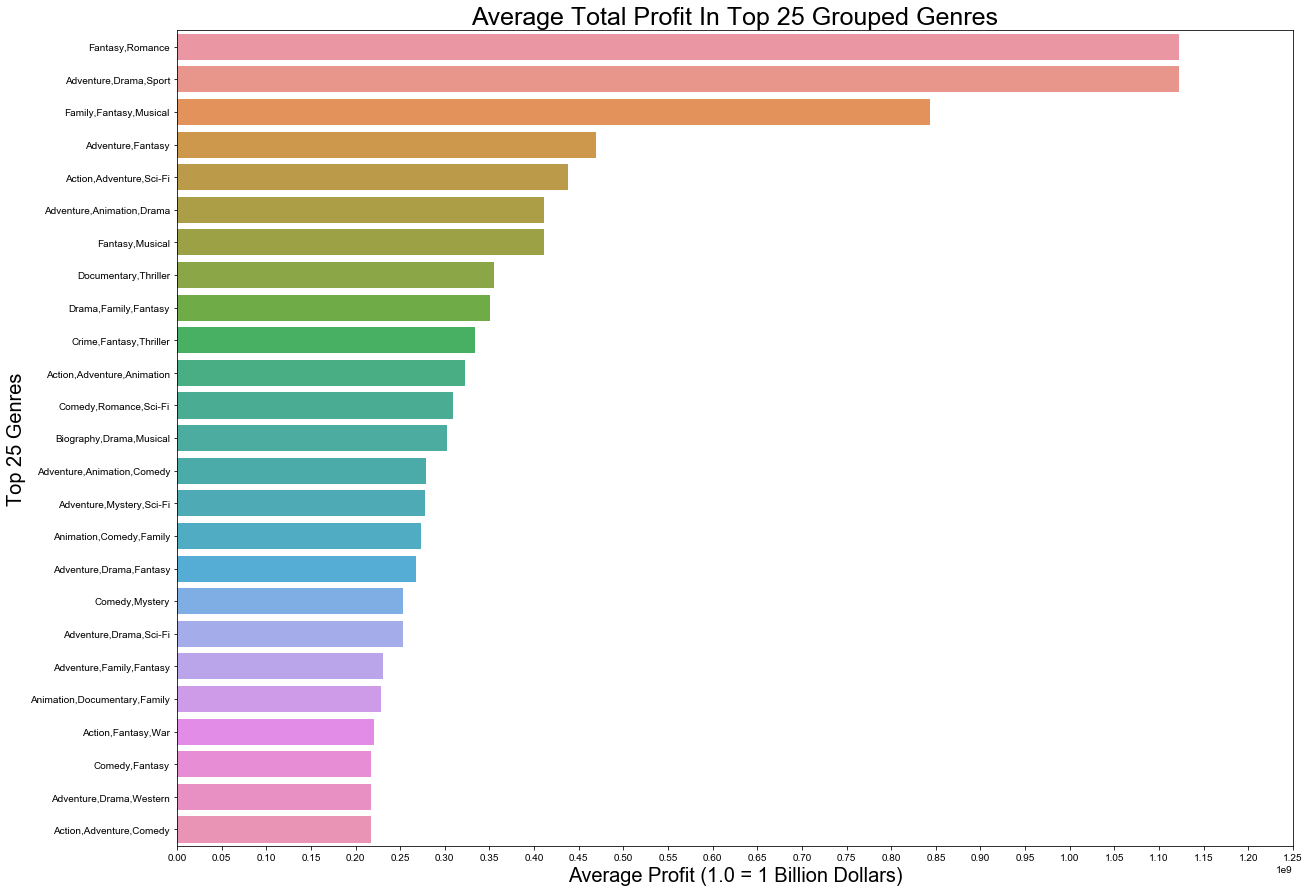

In [83]:
plt.figure(figsize=(20,15))
ax = sns.barplot(x='mean', y='genres', data=mean_df.head(25))
ax.set_title("Average Total Profit In Top 25 Grouped Genres", fontsize=25)
ax.set_xlabel('Average Profit (1.0 = 1 Billion Dollars)', fontsize=20)
ax.set_ylabel('Top 25 Genres', fontsize=20)
sns.set(style='darkgrid')
ax.set_xticks(range(0, 1300000000, 50000000))
plt.show()

### Here we see the sorted average Total Profit in the top 25 grouped genres. Now Let's do the same thing with median.

In [84]:
median_df = graph_df.sort_values("median", ascending=False)

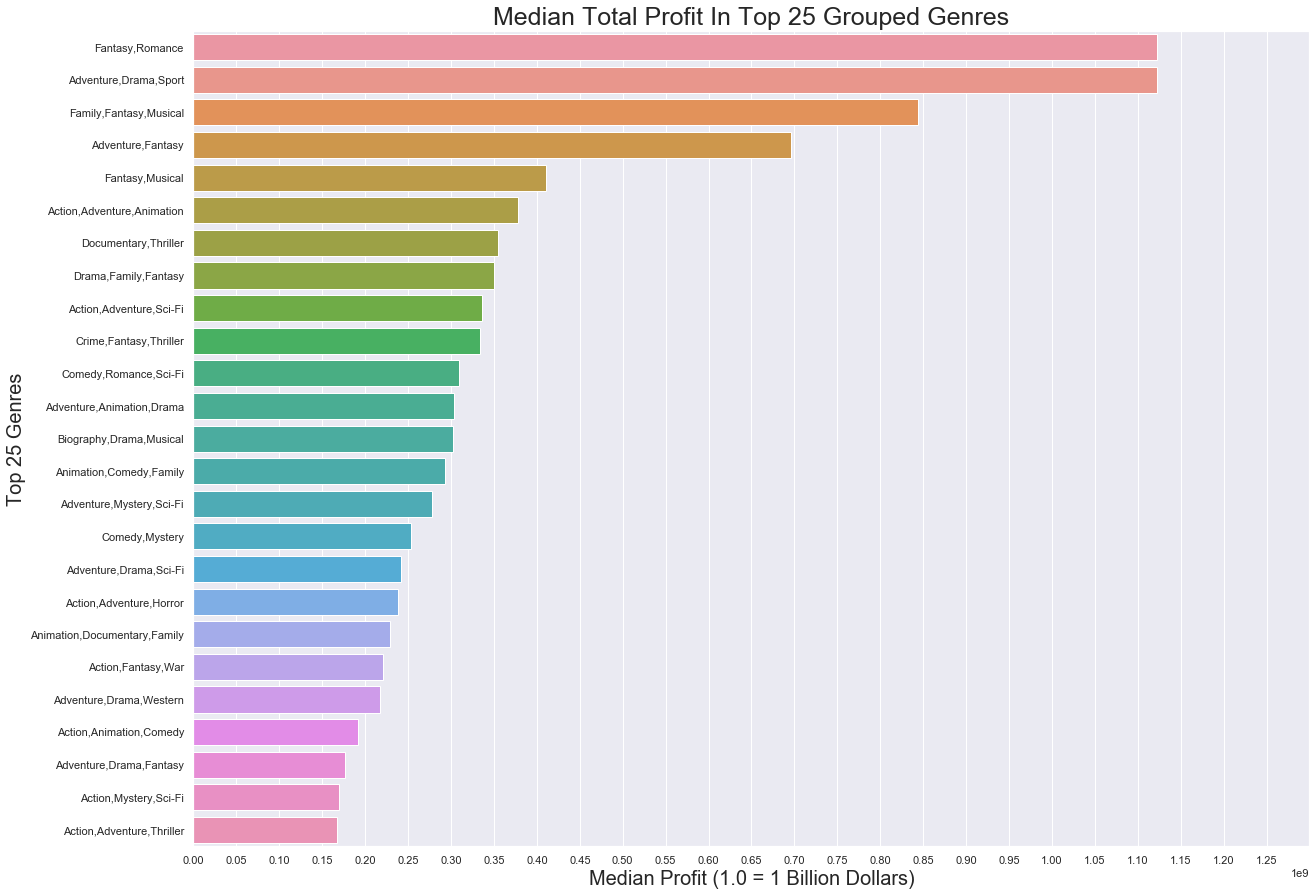

In [85]:
plt.figure(figsize=(20,15))
ax = sns.barplot(x='median', y='genres', data=median_df.head(25))
ax.set_title("Median Total Profit In Top 25 Grouped Genres", fontsize=25)
ax.set_xlabel('Median Profit (1.0 = 1 Billion Dollars)', fontsize=20)
ax.set_ylabel('Top 25 Genres', fontsize=20)
ax.set(xlim=(0, 1300000000))
sns.set(style='darkgrid')
ax.set_xticks(range(0, 1300000000, 50000000))
plt.show()

### So it seems like Fantasy/Romance and Adventure/Drama/Sport are the Top Grouped Genres according to both the mean and median graphs. Just to be safe, let's take a look at the number of movies each of the top 25 grouped genres have within 'new_df'.

In [86]:
i=0
for genre in median_df['genres'].head(25):
    test = new_df['genres'] == genre
    print(f"{genre} : Frequency = {test.sum()}")
    i+=1
print(i)

Fantasy,Romance : Frequency = 1
Adventure,Drama,Sport : Frequency = 1
Family,Fantasy,Musical : Frequency = 4
Adventure,Fantasy : Frequency = 3
Fantasy,Musical : Frequency = 2
Action,Adventure,Animation : Frequency = 17
Documentary,Thriller : Frequency = 1
Drama,Family,Fantasy : Frequency = 2
Action,Adventure,Sci-Fi : Frequency = 58
Crime,Fantasy,Thriller : Frequency = 1
Comedy,Romance,Sci-Fi : Frequency = 1
Adventure,Animation,Drama : Frequency = 3
Biography,Drama,Musical : Frequency = 1
Animation,Comedy,Family : Frequency = 7
Adventure,Mystery,Sci-Fi : Frequency = 1
Comedy,Mystery : Frequency = 2
Adventure,Drama,Sci-Fi : Frequency = 4
Action,Adventure,Horror : Frequency = 3
Animation,Documentary,Family : Frequency = 1
Action,Fantasy,War : Frequency = 1
Adventure,Drama,Western : Frequency = 1
Action,Animation,Comedy : Frequency = 5
Adventure,Drama,Fantasy : Frequency = 5
Action,Mystery,Sci-Fi : Frequency = 2
Action,Adventure,Thriller : Frequency = 14
25


In [87]:
i=0
for genre in mean_df['genres'].head(25):
    test = new_df['genres'] == genre
    print(f"{genre} : Frequency = {test.sum()}")
    i+=1
print(i)

Fantasy,Romance : Frequency = 1
Adventure,Drama,Sport : Frequency = 1
Family,Fantasy,Musical : Frequency = 4
Adventure,Fantasy : Frequency = 3
Action,Adventure,Sci-Fi : Frequency = 58
Adventure,Animation,Drama : Frequency = 3
Fantasy,Musical : Frequency = 2
Documentary,Thriller : Frequency = 1
Drama,Family,Fantasy : Frequency = 2
Crime,Fantasy,Thriller : Frequency = 1
Action,Adventure,Animation : Frequency = 17
Comedy,Romance,Sci-Fi : Frequency = 1
Biography,Drama,Musical : Frequency = 1
Adventure,Animation,Comedy : Frequency = 73
Adventure,Mystery,Sci-Fi : Frequency = 1
Animation,Comedy,Family : Frequency = 7
Adventure,Drama,Fantasy : Frequency = 5
Comedy,Mystery : Frequency = 2
Adventure,Drama,Sci-Fi : Frequency = 4
Adventure,Family,Fantasy : Frequency = 17
Animation,Documentary,Family : Frequency = 1
Action,Fantasy,War : Frequency = 1
Comedy,Fantasy : Frequency = 6
Adventure,Drama,Western : Frequency = 1
Action,Adventure,Comedy : Frequency = 33
25


### Just like we feared, many genres contain only 1 movie for that genre, and it happened to do well which ended up distorting the results of the graph. Let's set a limiter which allows only grouped genres that have 20 or more movies within that genre to be counted in the graphs.

In [88]:
genre_freq = {}
for genre in new_df['genres']:
    genre_freq[genre] = genre_freq.get(genre, 0) + 1
genre_freq_df = pd.DataFrame()

In [89]:
genre_freq_df = genre_freq_df.append(genre_freq, ignore_index=True).transpose()

In [90]:
genre_freq_df.reset_index(inplace=True)

In [91]:
genre_freq_df = genre_freq_df.rename(columns={"index": "genres", 0: "freq"})
genre_freq_df.head()

,genres,freq
0,None,72.0
1,Action,46.0
2,"Action,Adventure",6.0
3,"Action,Adventure,Animation",17.0
4,"Action,Adventure,Biography",5.0


In [ ]:
limit_mean_df = pysqldf("""SELECT *
                           FROM graph_df
                           JOIN genre_freq_df
                           USING(genres)
                           WHERE(freq>=25)
                           ORDER BY mean DESC;""")

In [118]:
limit_mean_df.head()

,genres,mean,median,min,max,freq
0,"Action,Adventure,Sci-Fi",4.385199e+08,335625934.5,-200237650.0,1.748134e+09,58.0
1,"Adventure,Animation,Comedy",2.787282e+08,159517956.0,-35851512.0,1.122470e+09,73.0
2,"Action,Adventure,Comedy",2.170153e+08,141751370.0,-106900000.0,8.744962e+08,33.0
3,"Action,Adventure,Fantasy",2.149730e+08,129276941.0,-26643867.0,9.868946e+08,41.0
4,"Action,Crime,Thriller",1.107740e+08,-2168465.5,-50334996.0,1.328723e+09,30.0


In [123]:
limit_median_df = pysqldf("""SELECT *
                             FROM graph_df
                             JOIN genre_freq_df
                             USING(genres)
                             WHERE(freq>=25)
                             ORDER BY median DESC;""")

,genres,mean,median,min,max,freq
0,"Action,Adventure,Sci-Fi",4.385199e+08,335625934.5,-200237650.0,1.748134e+09,58.0
1,"Adventure,Animation,Comedy",2.787282e+08,159517956.0,-35851512.0,1.122470e+09,73.0
2,"Action,Adventure,Comedy",2.170153e+08,141751370.0,-106900000.0,8.744962e+08,33.0
3,"Action,Adventure,Fantasy",2.149730e+08,129276941.0,-26643867.0,9.868946e+08,41.0
4,"Horror,Mystery,Thriller",6.860396e+07,44104225.0,-27507986.0,2.980001e+08,47.0


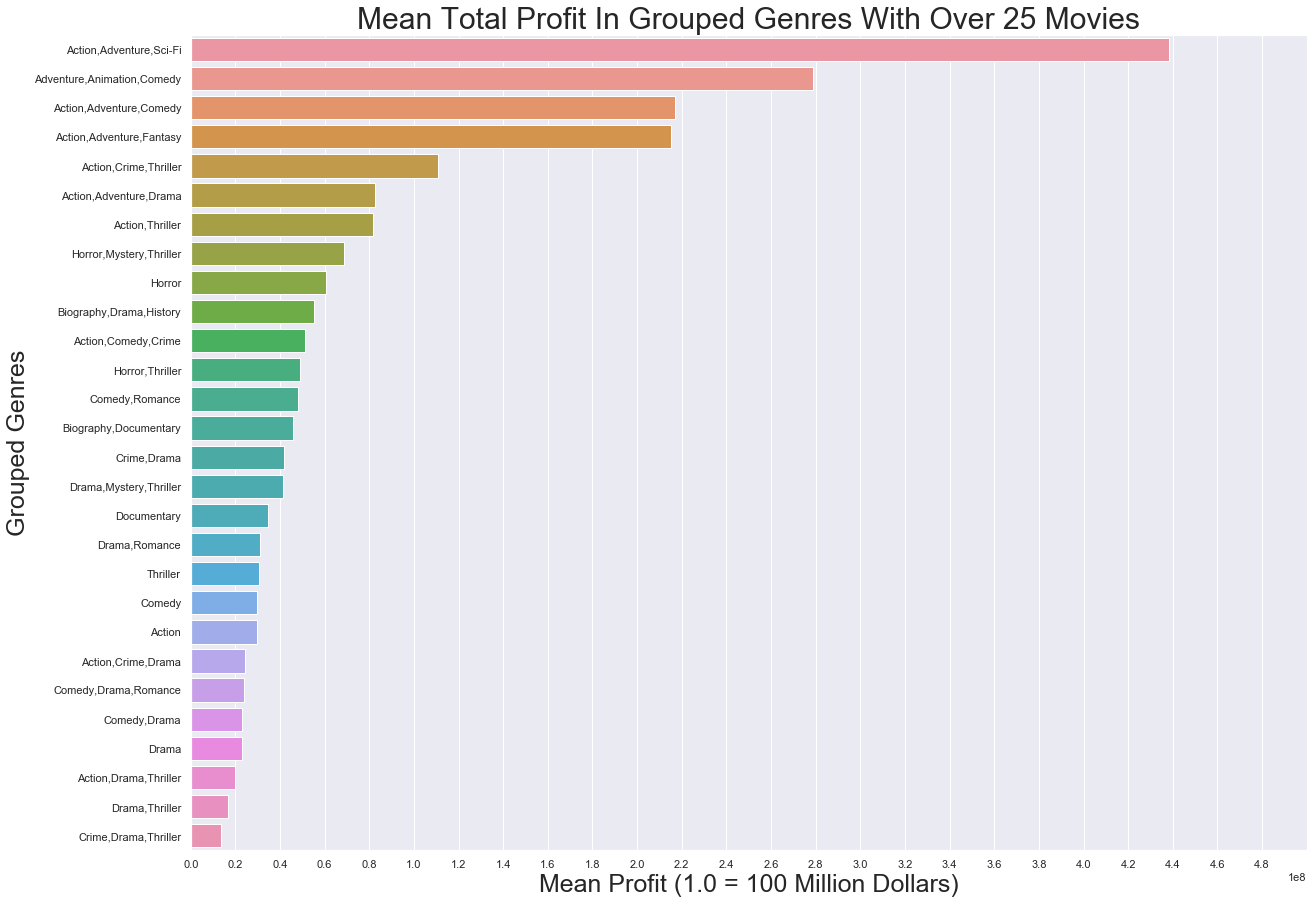

In [127]:
plt.figure(figsize=(20,15))
ax = sns.barplot(x='mean', y='genres', data=limit_mean_df)
ax.set_title("Mean Total Profit In Grouped Genres With Over 25 Movies", fontsize=30)
ax.set_xlabel('Mean Profit (1.0 = 100 Million Dollars)', fontsize=25)
ax.set_ylabel('Grouped Genres', fontsize=25)
ax.set(xlim=(0, 500000000))
sns.set(style='darkgrid')
ax.set_xticks(range(0, 500000000, 20000000))
plt.show()

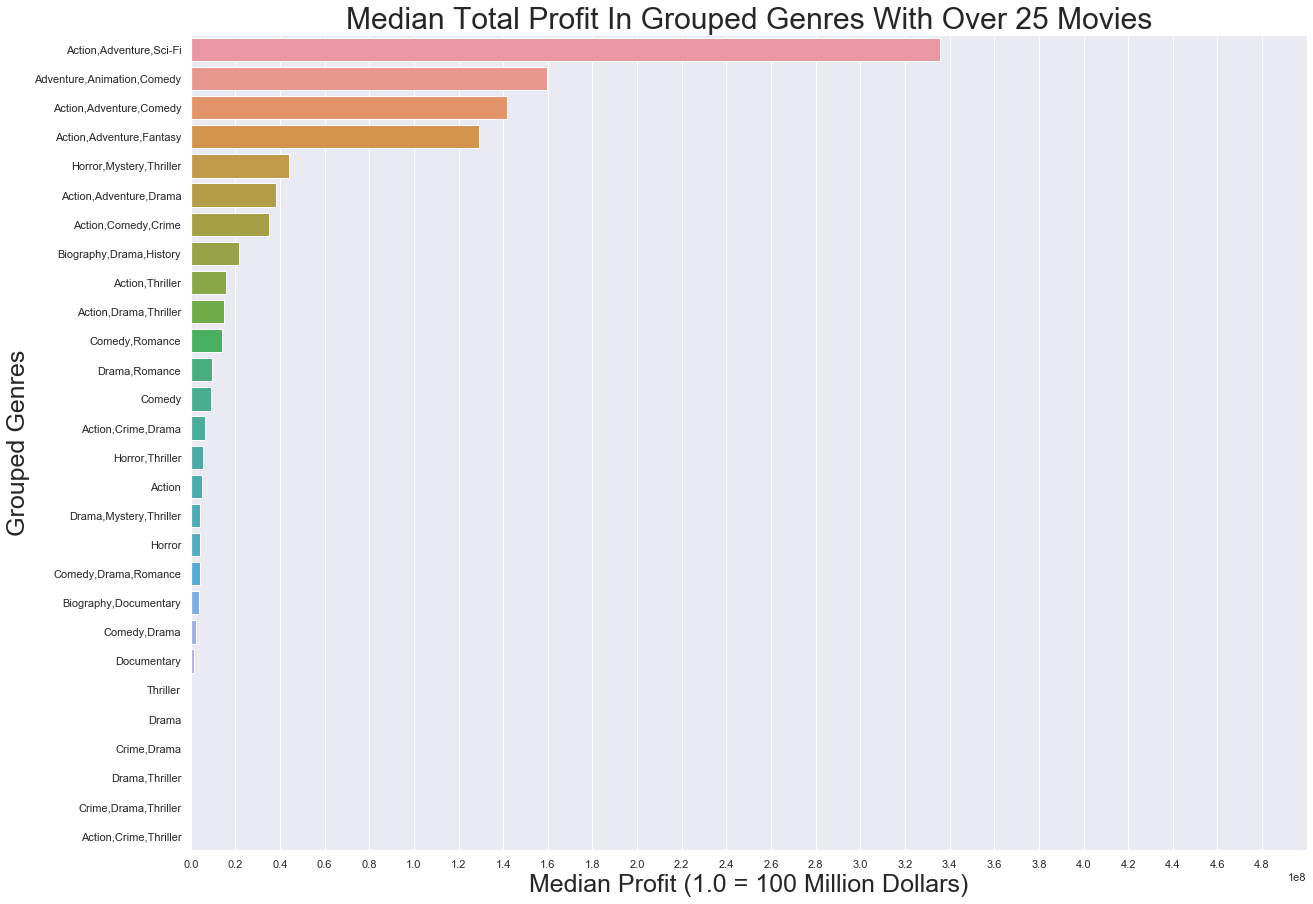

In [126]:
plt.figure(figsize=(20,15))
ax = sns.barplot(x='median', y='genres', data=limit_median_df)
ax.set_title("Median Total Profit In Grouped Genres With Over 25 Movies", fontsize=30)
ax.set_xlabel('Median Profit (1.0 = 100 Million Dollars)', fontsize=25)
ax.set_ylabel('Grouped Genres', fontsize=25)
ax.set(xlim=(0, 500000000))
sns.set(style='darkgrid')
ax.set_xticks(range(0, 500000000, 20000000))
plt.show()

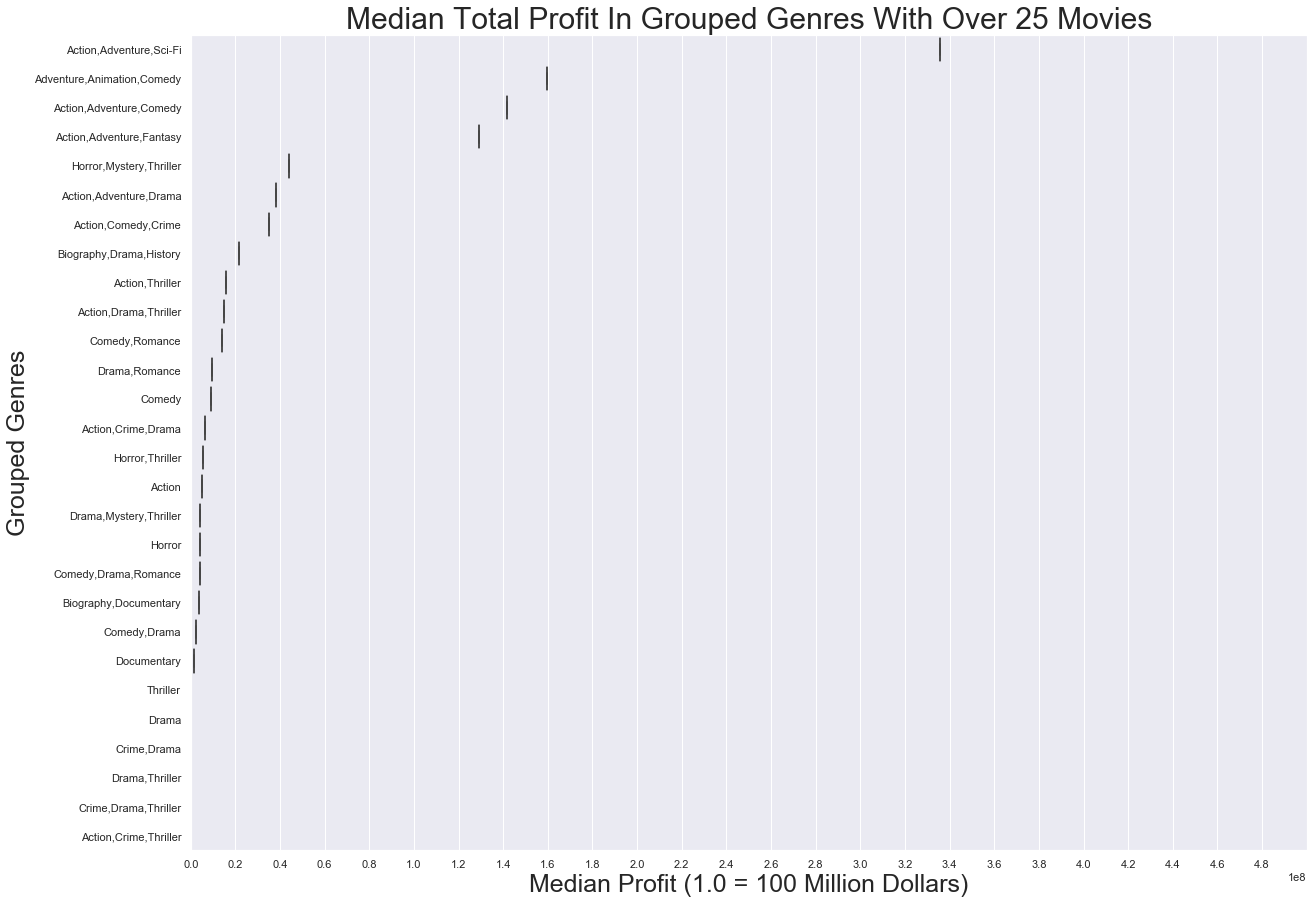